In [ ]:
Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

Business Goal:
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Please Note : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.

In [1]:
import pandas as pd
import numpy as np

In [3]:
#pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#chefcking the details like count of features and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#taking all possible null values.
missing_values = ['NaN','NA','na','N/A',np.nan] 
df = pd.read_csv('car data.csv', na_values= missing_values)

In [7]:
#checking the null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

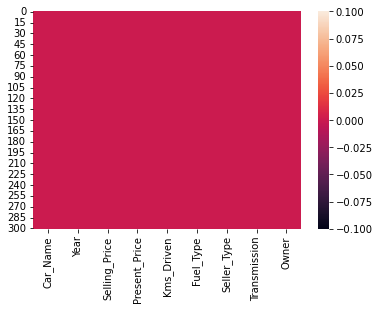

In [8]:
#visualling the null values
sns.heatmap(df.isnull())

In [9]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


<AxesSubplot:xlabel='Year'>

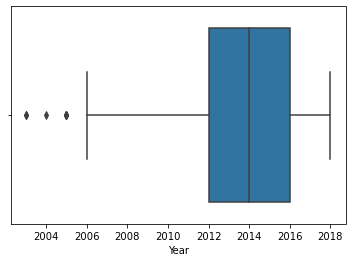

In [10]:
# chceking the odd values or outliers
sns.boxplot(x='Year', data = df )

<AxesSubplot:xlabel='Kms_Driven'>

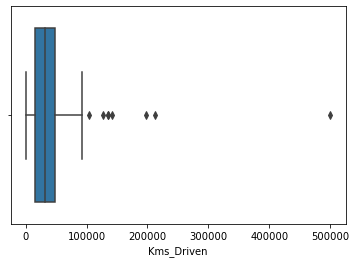

In [11]:
sns.boxplot(x='Kms_Driven', data = df )

In [12]:
# lets remove the outliers by using z-score
df['z_score_year'] = (df.Year - df.Year.mean())/df.Year.std()
df['z_score_Kms_driven'] = (df.Kms_Driven - df.Kms_Driven.mean())/df.Kms_Driven.std()

In [13]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,z_score_year,z_score_Kms_driven
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.128683,-0.255798
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,-0.217152,0.155651


In [14]:
df.shape

(301, 11)

In [15]:
#checking the of outliers for year
count_of_Year_outliers = df[(df['z_score_year']>3) & (df['z_score_year']>-3)]
count_of_Year_outliers
#no record out of z score range -3 to 3

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,z_score_year,z_score_Kms_driven


In [16]:
#checking the of outliers for Km driven
count_of_km_outliers = df[(df['z_score_Kms_driven']>3) & (df['z_score_Kms_driven']>-3)]
count_of_km_outliers
# 3 records

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,z_score_year,z_score_Kms_driven
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,-2.983830,4.120381
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,-1.254656,4.527305
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,-1.946326,11.907686


In [17]:
df.shape

(301, 11)

In [18]:
#removing the outliers from km driven
df_without_outliers = df[(df['z_score_Kms_driven']<3) & (df['z_score_Kms_driven']>-3)]
df_without_outliers.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,z_score_year,z_score_Kms_driven
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.128683,-0.255798
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,-0.217152,0.155651


In [19]:
df_without_outliers.shape

(298, 11)

In [20]:
#lets drop the z_score column and have datafram without outliers
New_df = df.drop(['z_score_year','z_score_Kms_driven'],axis = 1)
New_df.head(4)
#df.drop(df.ix[:, 'B':'D'].columns, axis = 1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0


In [21]:
New_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [22]:
New_df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [23]:
#we donot need car_name feature as it does not contain value in finding the results
Final_df = New_df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [25]:
Final_df.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [24]:
# To get how old a car is we will create a new feature with difference of current year  and car'year.
Final_df['Current Year'] = 2022

In [25]:
Final_df.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022


In [26]:
Final_df['No_years'] = Final_df['Current Year']- Final_df['Year']
Final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,No_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [27]:
#now lets drop Year and Current year features
Final_df.drop(['Year','Current Year'],axis=1 , inplace= True)

In [28]:
Final_df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5


In [29]:
# Lets deal with Categorical features
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


Using one-hot encoding
Each bit represents a possible category. If the variable cannot belong to multiple categories at once, then only one bit in the group can be “on.” This is called one-hot encoding

In [30]:
# using one-hot encoding
Final_df =  pd.get_dummies(Final_df , drop_first=True)
Final_df.head()
# we can see the after using drop first= True the each features 1st category has been droped to avoid dummy variable trap

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [31]:
#corr() is used to find the pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded.
#For any non-numeric data type columns in the dataframe it is ignored
Final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


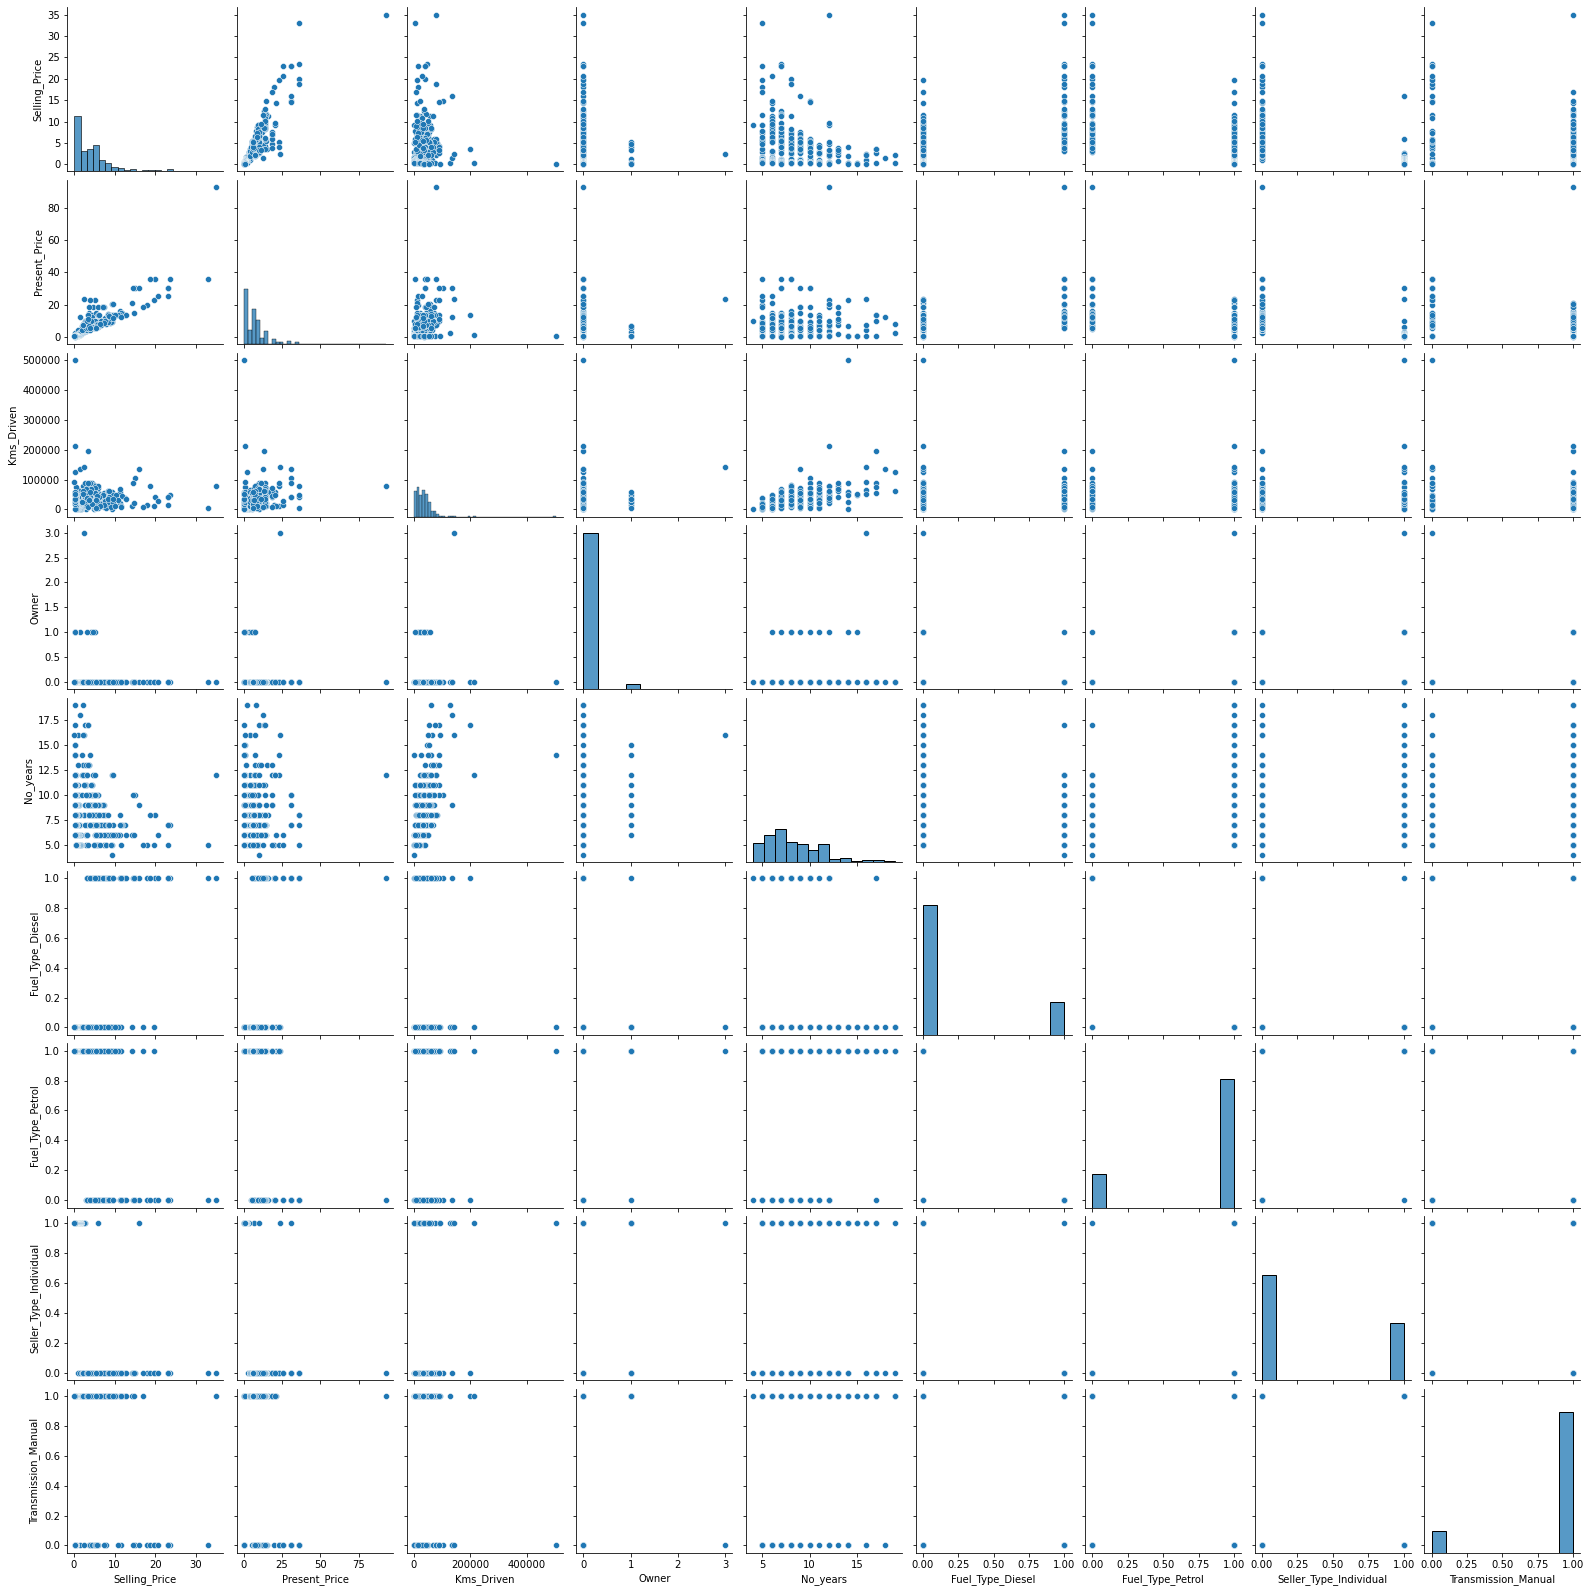

In [32]:
#lets visualize using seaborn
sns.pairplot(Final_df)

<AxesSubplot:>

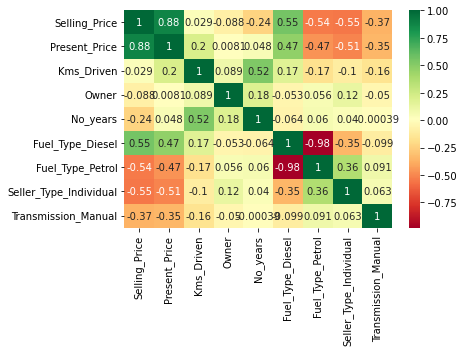

In [33]:
#To have more clearity we will use heatmap
corrmat = Final_df.corr()
top_corr_features = corrmat.index
sns.heatmap(Final_df[top_corr_features].corr(),annot=True , cmap = 'RdYlGn')


# Building model

In [34]:
#Defining independent and dependent features.
X = Final_df.drop('Selling_Price',axis=1)
y = Final_df['Selling_Price']


In [35]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=f18b1612316f320ffd85a83e97468551b9dd29553dff9320fd57a2a0a23baea5
  Stored in directory: c:\users\lokesh\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [37]:
#checking the features importance
from sklearn.ensemble import ExtraTreesRegressor
#ExtraTreesRegressor. An extra-trees regressor. 
#This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
model = ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [38]:
print(model.feature_importances_)

[0.36242379 0.04263559 0.000893   0.07450656 0.23804002 0.01009985
 0.12990037 0.14150083]


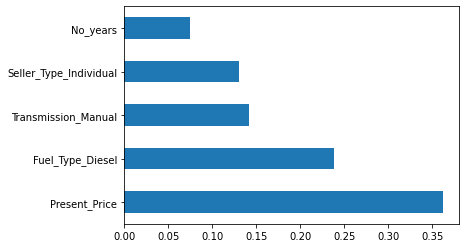

In [39]:
#lets visualize this
fea_imp = pd.Series(model.feature_importances_, index=X.columns ) 
fea_imp.nlargest(5).plot(kind='barh')
plt.show()

In [40]:
#lets train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [41]:
X_train.shape

(240, 8)

In [42]:
X_test.shape

(61, 8)

In [43]:
print(y_train.shape)
print(y_test.shape)


(240,)
(61,)


In [44]:
#lets build models
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()

In [45]:
#Hyperparameter tuning
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 100 , stop= 1200 , num= 12) ]
#Number of features to be considered at every split
max_features=['auto','sqrt']
#max level of depth in tree
max_depth= [ int(x) for x in np.linspace(5,30 , num= 60)]
#min sample required to split the a node
min_samples_split = [2,5,10,15,100]
#min samples required to split a leaf node
min_samples_leaf = [1,2,5,10]    

In [46]:
from sklearn.model_selection import RandomizedSearchCV
#Randomzed serach VC helps to fing the best hyperparameters.
#Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. 
#It is similar to grid search, and yet it has proven to yield better results comparatively. 
#The drawback of random search is that it yields high variance during computing

In [47]:
#create a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth ,
                'min_samples_split' : min_samples_split,
                 'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [48]:
#use random grid to search for best hyperparameters
#building model
#Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. 
#It is similar to grid search, and yet it has proven to yield better results comparatively. 
#The drawback of random search is that it yields high variance during computing
RF_random = RandomizedSearchCV(estimator = RF_model , param_distributions= random_grid ,
                               cv=5 , scoring='neg_mean_squared_error' , n_iter=10,
                              verbose=2 , random_state=42 , n_jobs=1)

In [49]:
RF_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 5, 5, 6, 6, 7, 7, 7, 8,
                                                      8, 9, 9, 10, 10, 10, 11,
                                                      11, 12, 12, 13, 13, 13,
                                                      14, 14, 15, 15, 16, 16,
                                                      16, 17, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                         

In [50]:
#lets pridict the evaluate
pred = RF_random.predict(X_test)
pred

array([ 2.49953114,  0.27521697,  7.94510219,  3.40186231,  0.43506576,
       14.67421335,  3.61955144,  7.53574579,  0.2337401 ,  0.60622502,
        7.95565324,  4.34268301,  2.90327065,  6.24626797,  0.51895268,
       10.19911327,  5.32221735,  1.1054741 ,  5.0762673 ,  0.5875583 ,
        4.99365468,  5.30008438,  5.23336829,  6.54047489,  3.04111474,
        1.17232757,  3.11366013,  0.53326399, 13.47731012,  2.80627497,
        3.06659791,  7.49173279,  5.14171695,  5.79245894,  0.45065862,
        0.72574666, 21.90844099, 21.47668752, 18.92181688,  4.21420709,
        7.05172305,  5.91307281,  3.60802625,  0.24322543,  4.20448076,
        8.03247319,  5.9989138 ,  4.5151082 , 13.99755299,  2.66196766,
        0.52941231,  1.14468253, 10.67272164,  0.41513622,  4.58331478,
        4.20178045,  0.41759366, 10.11655498,  7.19265873,  0.23830947,
        9.91304509])

In [ ]:
#lets visualize the prediction
sns.distplot(y_test - pred)
#we can see the results forming the tin normal distribution with minimum diff betn y_test(independed values) and pred (x_test)that means our prediction is good.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


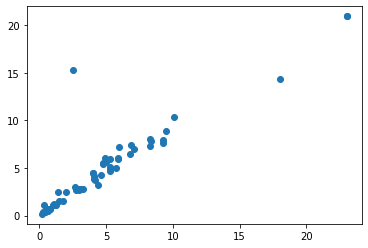

In [109]:
plt.scatter(y_test,pred)
#we can see here the selling price in linear in both y_test and predicted x-test

In [121]:
#lets pickel the file
import pickle
file = open('car_prodiction_random_forest.pkl', 'wb')
#dump information/data to that file
pickle.dump(RF_random , file)

After that create a requirement.txt file
txt file is used for specifying what python packages are required to run the project you are looking at. Typically the requirements. ... Especially if it is a larger project.
#So you want to keep track of what version of each package you are using to prevent unexpected changes.

In [ ]:
Fina